In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
import vice
import numpy as np
import math as m
import sys
load_mpl_presets()
print(sys.version_info)

/var/home/johnson.7419.local/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


In [2]:
raw = np.genfromtxt("../mock.dat")
data = vice.dataframe({})
data["[fe/h]"] = [row[0] for row in raw]
data["[o/fe]"] = [row[1] for row in raw]
data["age"] = [row[2] for row in raw]
out = vice.output("../mock")

<ipython-input-3-fe93b1c23d98>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


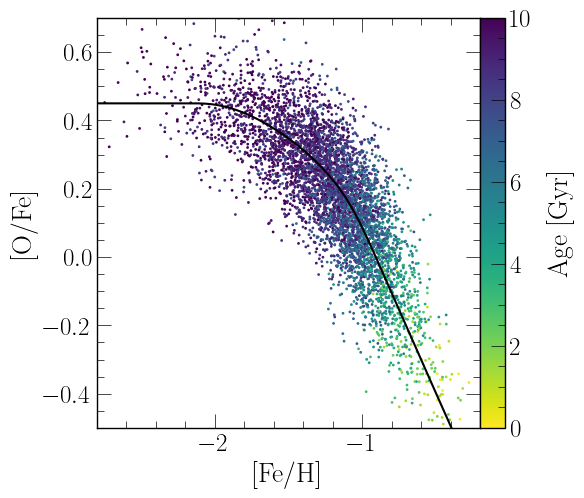

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
# ax.set_xlim([-1.7, 0.2])
# ax.set_ylim([-0.1, 0.5])
ax.set_xlim([-2.8, -0.2])
ax.set_ylim([-0.5, 0.7])
kwargs = {
    "s": 1,
    "c": data["age"],
    "vmin": 0,
    "vmax": 10,
    "cmap": "viridis_r"
}
sc = ax.scatter(data["[fe/h]"], data["[o/fe]"], **kwargs)
ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["black"])
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10)
cbar.set_ticks(range(0, 12, 2))
plt.tight_layout()
cbar_ax.set_position([
    ax.get_position().x1,
    ax.get_position().y0,
    0.05,
    ax.get_position().y1 - ax.get_position().y0
])
plt.show()

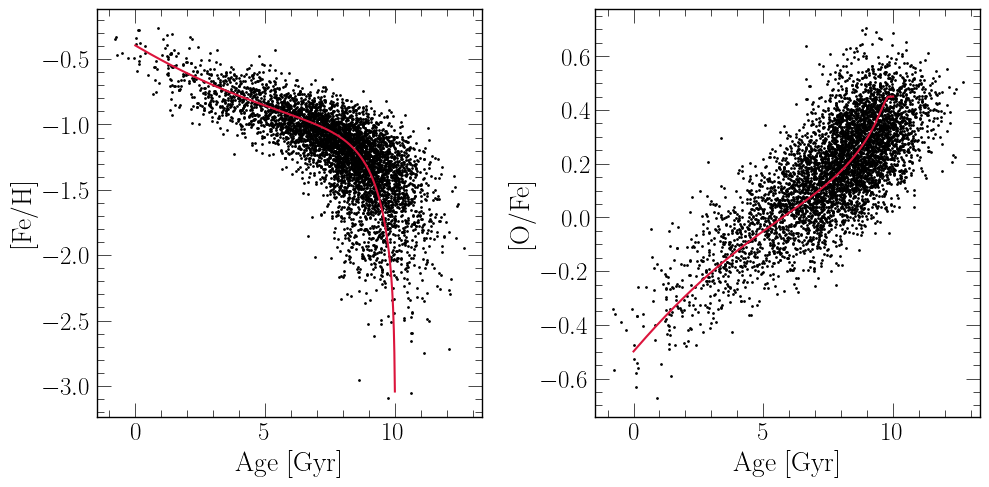

In [7]:
fig = plt.figure(figsize = (10, 5))
axes = []
ylabels = ["[Fe/H]", "[O/Fe]"]
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlabel("Age [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    
kwargs = {
    "s": 1,
    "c": named_colors()["black"]
}
for i in range(len(axes)):
    axes[i].scatter(data["age"], data[ylabels[i]], **kwargs)
    axes[i].plot(out.history["lookback"], out.history[ylabels[i]], c = named_colors()["crimson"])
plt.tight_layout()
plt.show()